# Import all kind of stuff

In [1]:
import numpy as np
from numpy.typing import NDArray
import matplotlib.pyplot as plt

import sys

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

from scipy.special import jv

sys.path.append("/Users/oliver/Documents/p5control-bluefors-evaluation")

from theory.utilities.cpd5 import get_color, get_colors
from theory.utilities.cpd5 import (
    seeblau120,
    seeblau100,
    seeblau80,
    seeblau65,
    seeblau35,
    seeblau20,
)
from theory.utilities.cpd5 import (
    seegrau100,
    seegrau80,
    seegrau65,
    seegrau35,
    seegrau20,
)

from theory.utilities.constants import k_B_meV, G_0_muS, e, h
from theory.utilities.types import NDArray64

from theory.utilities.functions import bin_y_over_x, oversample

# theory
from theory.models.bcs import Delta_meV_of_T
from theory.models.bcs import get_I_nA as get_I_nA_bcs
from theory.models.tg import get_I_pat_nA as get_I_nA_tg

sys.path.append("/Users/oliver/Documents/doctoral-thesis/.utilities/")

from layout import get_figure, theory_layout

from matplotlib_inline.backend_inline import InlineBackend

InlineBackend.print_figure_kwargs = {"bbox_inches": None, "pad_inches": 0.0}
%config InlineBackend.print_figure_kwargs = {'bbox_inches': None, 'pad_inches': 0.0}
%config InlineBackend.figure_format = "retina"   # or "png"
%config InlineBackend.rc = {"figure.dpi": 300}   # choose a value you like

import matplotlib as mpl
mpl.rcParams["axes.unicode_minus"] = False

# Set plot fontsizes

In [2]:
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
plt.rcParams["axes.labelsize"] = 8
plt.rcParams["font.size"] = 9
plt.rcParams["legend.fontsize"] = 8
plt.rcParams["xtick.labelsize"] = 8
plt.rcParams["ytick.labelsize"] = 8

In [3]:
textwidth = 4.25279  # in
textheight = 6.85173

print(
    " 1.0",
    textwidth,
    textheight,
    "\n",
    "0.9",
    0.9 * textwidth,
    0.9 * textheight,
    "\n",
    "0.8",
    0.8 * textwidth,
    0.8 * textheight,
    "\n",
    "0.7",
    0.7 * textwidth,
    0.7 * textheight,
    "\n",
    "0.6",
    0.7 * textwidth,
    0.7 * textheight,
    "\n",
    "0.5",
    0.5 * textwidth,
    0.5 * textheight,
    "\n",
    "0.4",
    0.4 * textwidth,
    0.4 * textheight,
    "\n",
)

 1.0 4.25279 6.85173 
 0.9 3.8275110000000003 6.166557 
 0.8 3.402232 5.481384 
 0.7 2.976953 4.796211 
 0.6 2.976953 4.796211 
 0.5 2.126395 3.425865 
 0.4 1.701116 2.740692 



# $\Delta(r)$

In [4]:
x = np.linspace(0, 3 * 2 * np.pi, 361)
barrier_width = 0.25 * np.pi
barrier_0 = 4 * np.pi
x_barrier0 = barrier_0 - barrier_width / 2
x_barrier1 = barrier_0 + barrier_width / 2

damping = 10 * np.pi
damping1 = np.where(
    x < x_barrier0,
    1.0,
    np.exp((x_barrier0 - x) / damping),
)
damping2 = np.where(
    x > x_barrier1,
    1.0,
    np.exp((-x_barrier1 + x) / damping),
)

nu = 1
phi = 1 * np.pi
phi_0 = np.pi / 2
phi_off = np.pi / 2

psi1 = np.sin((x / (nu) - (phi_0))) ** 1
psi2 = np.sin((x / (nu) - (phi_0 + phi))) ** 1
psi1 *= damping1
psi2 *= damping2

psi_half = 0
psi_min = -1
psi_max = 1

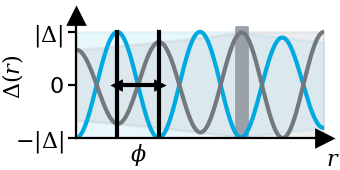

In [5]:
fig, ax = get_figure(figsize=(1.7, 0.85))

# damping
ax.fill_between(x, +damping1, -damping1, color=get_color("seeblau", "35", alpha=0.25))
ax.fill_between(x, +damping2, -damping2, color=get_color("seegrau", "35", alpha=0.25))


# barrier
ax.fill_between(
    x=[x_barrier0, x_barrier1],
    y1=[psi_min, psi_min],
    y2=[psi_max * 1.1, psi_max * 1.1],
    color=seegrau65,
    alpha=1,
)

# wave function
ax.plot(x, psi1, color=get_color("seeblau", "100"))
ax.plot(x, psi2, color=get_color("seegrau", "80"))

# ax.plot(x, +damping1, "--", color=get_color("seeblau", "100"))
# ax.plot(x, -damping1, "--", color=get_color("seeblau", "100"))
# ax.plot(x, +damping2, "--", color=get_color("seegrau", "80"))
# ax.plot(x, -damping2, "--", color=get_color("seegrau", "80"))

color = "k"
ax.plot(
    [phi_off + phi_0, phi_off + phi_0 + phi],
    [psi_half, psi_half],
    "-",
    color=color,
)
ax.plot([phi_off + phi_0, phi_off + phi_0], [psi_min, psi_max], "-", color=color)
ax.plot(
    [phi_off + phi_0 + phi, phi_off + phi_0 + phi], [psi_min, psi_max], "-", color=color
)
ax.plot([phi_off + phi_0 + phi], [psi_half], ">", color=color, clip_on=False, ms=3)
ax.plot([phi_off + phi_0], [psi_half], "<", color=color, clip_on=False, ms=3)

ax.set_ylim(psi_min, psi_max * 1.3)
ax.set_xlim(np.min(x), np.max(x))

ax.set_xticks([phi_off + phi_0, phi_off + phi_0 + phi], ["$\\phi1$", "$\\phi_2$"])
ax.set_xticks([phi_off + phi_0 + phi / 2], ["$\\phi$"])
# ax.set_xticks([])
ax.set_yticks([-1, 0, 1], ["$-|\\Delta|$", "0", "$|\\Delta|$"])
# ax.set_yticks([])


title = "delta-r"
xlabel = "$r$"
ylabel = "$\\Delta (r)$"

ax.tick_params(
    axis="x",
    color="white",
    length=0,
)

theory_layout(fig, ax, title, xlabel, ylabel, padding=(0.3, 0.08))

# Josephson $I(\phi)$

In [6]:
phi = np.linspace(0, 2.64 * np.pi, 361)
I_J_phi = np.sin(phi)

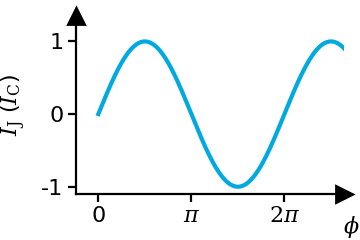

In [7]:
fig, ax = get_figure(figsize=(1.8, 1.2))
ax.plot(
    phi,
    I_J_phi,
    color=seeblau100,
)

ax.set_ylim((-1.1, 1.35))
ax.set_yticks([0, 1, -1])

ax.set_xlim([-0.24 * np.pi, 2.64 * np.pi])
ax.set_xticks([0, np.pi, 2 * np.pi], labels=["0", "$\\pi$", "$2\\pi$"])

xlabel = "$\\phi$"
ylabel = "$I_\\mathrm{J}$ ($I_\\mathrm{C}$)"
title = "josephson-iphi"

theory_layout(fig, ax, title, xlabel, ylabel)

# Josephson $I(t)$

In [8]:
from theory.utilities.constants import k_B_meV, G_0_muS, e, h

Delta_meV = 0.180
t_ps = np.linspace(0, 30, 1001)  # ns
V_mV = np.array([Delta_meV])
I_C = np.pi / 2
phi_0 = 0.0

nu_0_GHz = 2 * e / h * V_mV * 1e-3 * 1e-9
t_0_ps = 1 / nu_0_GHz

phi = np.zeros((t_ps.shape[0], V_mV.shape[0]))
for i, v_mV in enumerate(V_mV):
    phi[:, i] = phi_0 + 2 * np.pi * nu_0_GHz[i] * t_ps * 1e-3

I_J = I_C * np.sin(phi)
t_0_ps

array([0.01148797])

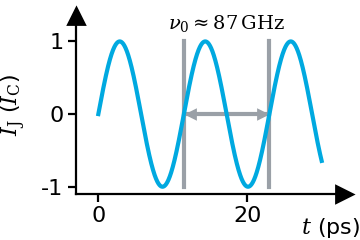

In [9]:
fig, ax = get_figure(figsize=(1.8, 1.2))

for i, v_mV in enumerate(V_mV):
    ax.plot(
        t_ps,
        I_J[:, i] / I_C,
        color=seeblau100,
        zorder=10,
    )
t_0 = 1e3 / nu_0_GHz[0]
ax.plot([t_0, 2 * t_0], [0, 0], "-", color=seegrau65)
ax.plot([t_0, t_0], [-1, 1], "-", color=seegrau65)
ax.plot([2 * t_0, 2 * t_0], [-1, 1], "-", color=seegrau65)
ax.plot([2 * t_0 - 1], [0], ">", color=seegrau65, clip_on=False, ms=3)
ax.plot([t_0 + 1], [0], "<", color=seegrau65, clip_on=False, ms=3)
ax.text(
    t_0 * 1.5,
    1.25,
    "$\\nu_0 \\approx 87\\,\\mathrm{GHz}$",  # t_0 \\approx 11\\,\\mathrm{ps},
    color="k",
    ha="center",
    va="center",
    fontsize=7,
)

ax.set_ylim((-1.1, 1.35))
ax.set_yticks([0, 1, -1])

ax.set_xlim([-3, 33])
ax.set_xticks([0, 20])

xlabel = "$t$ (ps)"
ylabel = "$I_\\mathrm{J}$ ($I_\\mathrm{C}$)"
title = "josephson-it"

theory_layout(fig, ax, title, xlabel, ylabel)

# Josephson $I(V)$
https://en.wikipedia.org/wiki/Josephson_effect#/media/File:I-V_characteristics_of_Josephson_Junction.JPG

In [10]:
Delta_meV = 0.18
gamma_meV = 0.0
T_K = 0.0
V_0 = np.linspace(0, 3.08, 281)
G_N = 0.001
I_C = np.pi / 2

from theory.models.bcs import get_I_nA as get_I_nA_bcs

I_bcs = get_I_nA_bcs(
    V_mV=V_0 * Delta_meV,
    Delta_meV=Delta_meV,
    G_N=G_N,
    T_K=T_K,
    gamma_meV=gamma_meV,
) / (Delta_meV * G_0_muS * G_N)
I = np.concatenate((np.array([0.0, I_C]), I_bcs))
V = np.concatenate((np.array([0.0, 0.0]), V_0))

I = np.concatenate((-np.flip(I), I))
V = np.concatenate((-np.flip(V), V))

V_mV = V * Delta_meV

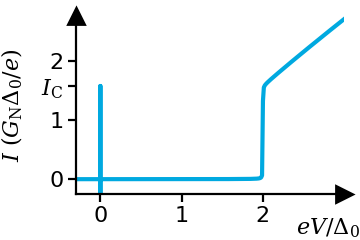

In [11]:
fig, ax = get_figure(figsize=(1.8, 1.2))

ax.plot(
    V,
    I,
    color=seeblau100,
)

ax.set_xlim([-0.3, 3])
ax.set_xticks([0, 1, 2], labels=["0", "1", "2"])

ax.set_ylim([-0.25, 2.75])
ax.set_yticks([0, 1, 2, I_C], labels=["0", "1", "2", "$I_\\mathrm{C}$"])

xlabel = "$eV/\\Delta_0$"
ylabel = "$I\\ (G_\\mathrm{N}\\Delta_0/e)$"
title = "josephson-iv"

theory_layout(fig, ax, title, xlabel, ylabel)

# $I_C(T)$ Ambegaokar-Baratoff

In [12]:
Delta_0_meV = 0.18
T_C_K = Delta_0_meV / (1.764 * k_B_meV)
T_K = np.linspace(0, T_C_K, 101)
Delta_T_meV = np.zeros_like(T_K)
for i, T in enumerate(T_K):
    Delta_T_meV[i] = Delta_meV_of_T(Delta_meV=Delta_0_meV, T_K=T)
I_C_nA = np.pi / 2 * Delta_0_meV
I_C_AB = Delta_T_meV * np.pi / (2) * np.tanh(Delta_T_meV / (2 * k_B_meV * T_K)) / I_C_nA
I_C_lin = (T_C_K - T_K) * 635e-3 / I_C_nA
I_C_lin[I_C_lin > 1.0] = np.nan

/var/folders/kc/8fnzl3f94vxgl8w4wm3wfvk80000gn/T/ipykernel_60997/3616836601.py:8: RuntimeWarning: divide by zero encountered in divide
  I_C_AB = Delta_T_meV * np.pi / (2) * np.tanh(Delta_T_meV / (2 * k_B_meV * T_K)) / I_C_nA


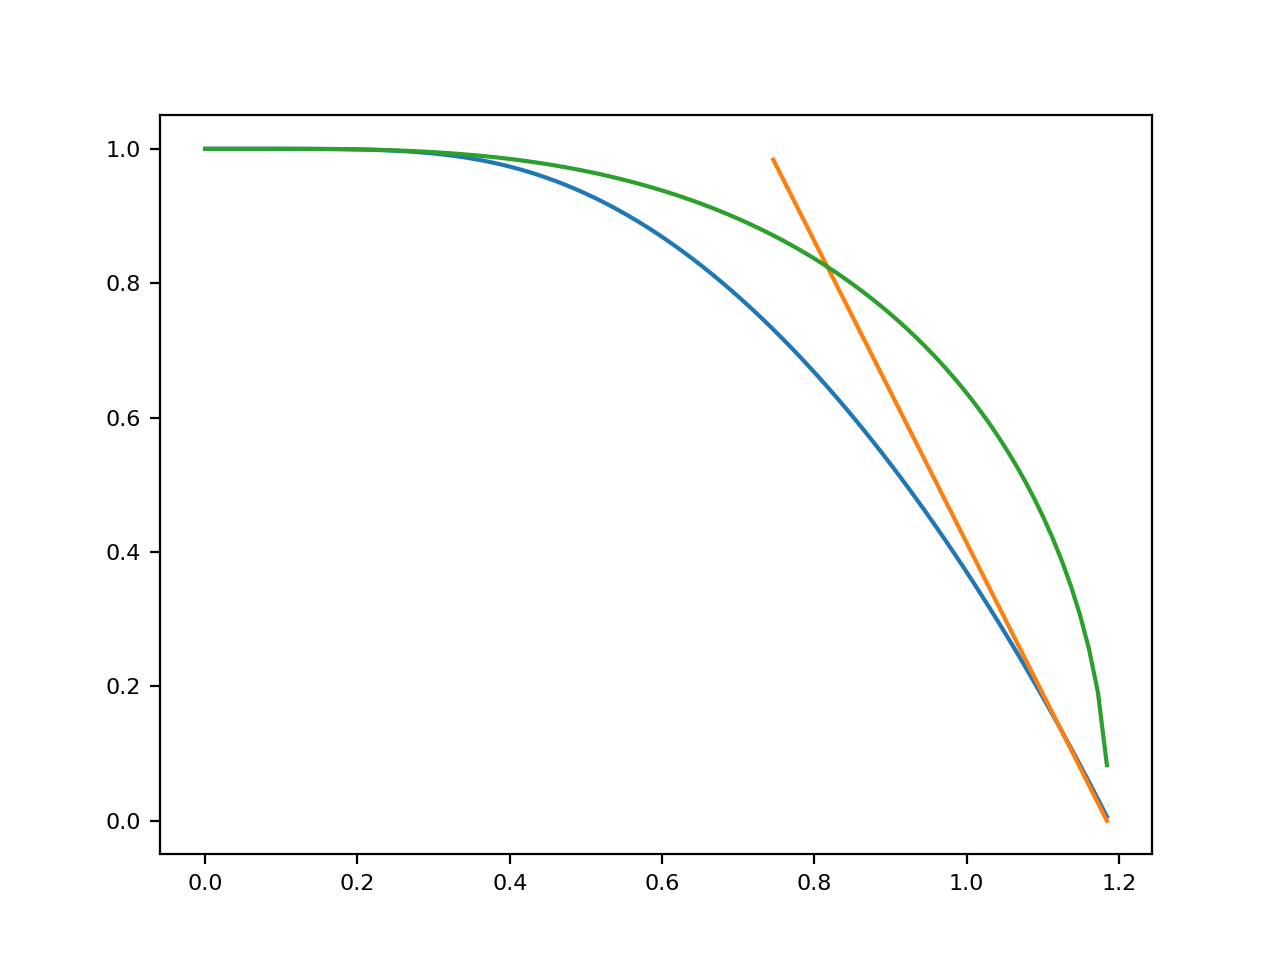

In [13]:
plt.plot(T_K, I_C_AB)
plt.plot(T_K, I_C_lin)
plt.plot(T_K, Delta_T_meV / Delta_0_meV)

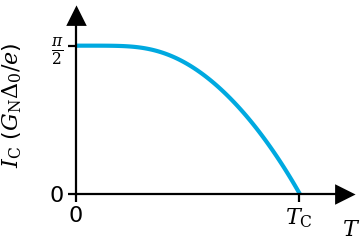

In [14]:
fig, ax = get_figure(figsize=(1.8, 1.2))

# Plot the simplified gap curve
ax.plot(T_K / T_C_K, I_C_AB, color=seeblau100)

ax.set_xlim(0, 1.2)
ax.set_ylim(0, 1.2)
ax.set_yticks([0, 1], labels=["0", "$\\frac{\\pi}{2}$"])
ax.set_xticks([0, 1], labels=["0", "$T_\\mathrm{C}$"])

xlabel = "$T$"
ylabel = "$I_\\mathrm{C}$ ($G_\\mathrm{N}\\Delta_0/e$)"
title = "critical-current"

theory_layout(fig, ax, title, xlabel, ylabel)

# $U(\phi)$

In [15]:
I = np.array([0, 0.5, 0.99])
phi = np.linspace(-2.6, 1.1, 371)
phi_pi = phi * 2 * np.pi
U_phi = np.zeros((phi.shape[0], I.shape[0]))
for j, i in enumerate(I):

    U_phi[:, j] = -np.cos(phi_pi) - i * phi_pi

dudphi = np.abs(np.gradient(U_phi, phi, axis=0))


def local_minima_indices(y: np.ndarray, *, strict: bool = True) -> np.ndarray:
    y = np.asarray(y)
    if y.ndim != 1 or y.size < 3:
        return np.zeros(0, dtype=int)

    if strict:
        m = (y[1:-1] < y[:-2]) & (y[1:-1] < y[2:])
    else:
        m = (
            (y[1:-1] <= y[:-2])
            & (y[1:-1] <= y[2:])
            & ((y[1:-1] < y[:-2]) | (y[1:-1] < y[2:]))
        )
    return np.flatnonzero(m) + 1


idx0 = local_minima_indices(+dudphi[:, 0])
idx1 = local_minima_indices(+dudphi[:, 1])
idx2 = local_minima_indices(-dudphi[:, 2])

x_ball0 = phi[idx0[1]]
x_ball1a = phi[idx1[1]]
x_ball1b = phi[idx1[3]]
x_ball2 = phi[idx2[2]]

U_phi_0_move = np.copy(U_phi[:, 0])
U_phi_1a_move = np.copy(U_phi[:, 1])
U_phi_1b_move = np.copy(U_phi[:, 1])
U_phi_2_move = np.copy(U_phi[:, 2])

U_phi_0_move += 0.8
U_phi_1a_move += 0.8
U_phi_1b_move += 0.8
U_phi_2_move += 0.8

y_ball0 = U_phi_0_move[idx0[1]]
y_ball1a = U_phi_1a_move[idx1[1]]
y_ball1b = U_phi_1b_move[idx1[3]]
y_ball2 = U_phi_2_move[idx2[2]]

U_phi_0_move[U_phi_0_move >= y_ball0 + 0.3] = np.nan
U_phi_0_move[phi >= -1.5] = np.nan

U_phi_1a_move[U_phi_1a_move >= y_ball1a + 0.3] = np.nan
U_phi_1a_move[U_phi_1a_move < y_ball1a] = np.nan
U_phi_1a_move[phi >= -1.5] = np.nan

U_phi_1b_move[U_phi_1b_move >= y_ball1b + 0.3] = np.nan
U_phi_1b_move[U_phi_1b_move < y_ball1b] = np.nan
U_phi_1b_move[phi >= -0.6] = np.nan

U_phi_2_move[U_phi_2_move <= 0.1] = np.nan
# U_phi_1_move[phi <= -1.2] = np.nan

U_phi_jump = np.copy(U_phi[:, 1])
U_phi_jump += 1.6
U_phi_jump[phi < -1.6] = np.nan
U_phi_jump[phi > -1.2] = np.nan

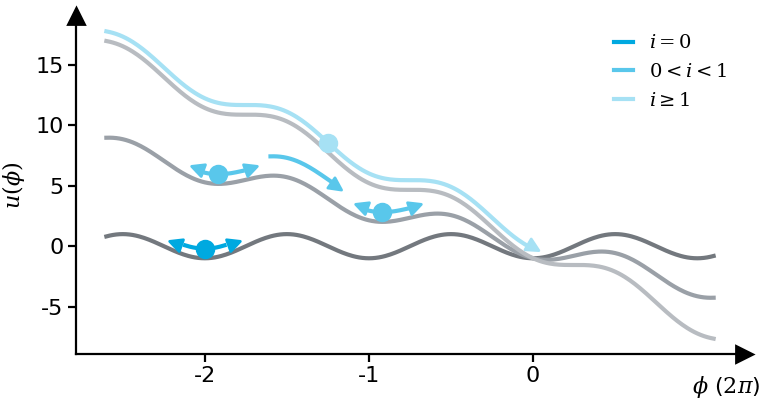

In [51]:
fig, ax = get_figure(
    figsize=(3.8, 2.0),
)

from matplotlib.markers import MarkerStyle

jump_color = seeblau65

# trajectories
ax.plot(phi, U_phi_0_move, color=seeblau100)
ax.plot(phi, U_phi_1a_move, color=seeblau65)
ax.plot(phi, U_phi_2_move, color=seeblau35)

# phase slips
ax.plot(phi, U_phi_1b_move, color=seeblau65)
ax.plot(phi, U_phi_jump, color=jump_color)

# marker phase slip
ms = MarkerStyle(">")
ms._transform = ms.get_transform().rotate_deg(-35)
ax.scatter([-1.2], [5], marker=ms, s=20, color=jump_color, clip_on=False)

s = 20
# marker stable phase
ms = MarkerStyle(">")
ms._transform = ms.get_transform().rotate_deg(20)
ax.scatter(
    [x_ball0 + 0.18], [y_ball0 + 0.5], marker=ms, s=s, color=seeblau100, clip_on=False
)

ms = MarkerStyle("<")
ms._transform = ms.get_transform().rotate_deg(-20)
ax.scatter(
    [x_ball0 - 0.18], [y_ball0 + 0.5], marker=ms, s=s, color=seeblau100, clip_on=False
)

# marker meat-stable phase
ms = MarkerStyle(">")
ms._transform = ms.get_transform().rotate_deg(20)
ax.scatter(
    [x_ball1a + 0.2], [y_ball1a + 0.5], marker=ms, s=s, color=seeblau65, clip_on=False
)

ms = MarkerStyle("<")
ms._transform = ms.get_transform().rotate_deg(-20)
ax.scatter(
    [x_ball1a - 0.13], [y_ball1a + 0.5], marker=ms, s=s, color=seeblau65, clip_on=False
)

ms = MarkerStyle(">")
ms._transform = ms.get_transform().rotate_deg(20)
ax.scatter(
    [x_ball1b + 0.2], [y_ball1b + 0.5], marker=ms, s=s, color=seeblau65, clip_on=False
)

ms = MarkerStyle("<")
ms._transform = ms.get_transform().rotate_deg(-20)
ax.scatter(
    [x_ball1b - 0.13], [y_ball1b + 0.5], marker=ms, s=s, color=seeblau65, clip_on=False
)

# marker running phase
ms = MarkerStyle(">")
ms._transform = ms.get_transform().rotate_deg(-30)
ax.scatter([0], [-0.1], marker=ms, s=s, color=seeblau35, clip_on=False)

# phase particles
ax.plot(x_ball0, y_ball0, "o", color=seeblau100, clip_on=False)
ax.plot(x_ball1a, y_ball1a, "o", color=seeblau65, clip_on=False)
ax.plot(x_ball1b, y_ball1b, "o", color=seeblau65, clip_on=False)
ax.plot(x_ball2, y_ball2, "o", color=seeblau35, clip_on=False)

seegraus = [seegrau80, seegrau65, seegrau35]
for j, i in enumerate(I):
    ax.plot(phi, U_phi[:, j], color=seegraus[j], zorder=0)

ax.set_xticks([-2, -1, 0])
# ax.set_yticks([])
ax.legend(
    ["$i=0$", "$0 < i < 1$", "$i\\geq 1$"],
    # ["$i=0$", "$i \\in [0, 1]$", "$i\\geq 1$"],
    # title="$i=$",
    handlelength=1.0,
    loc="upper right",
    frameon=False,
    fontsize=7,
    title_fontsize=7,
    ncols=1,
    columnspacing=1.0,
)

title = "u-phi"
xlabel = "$\\phi$ ($2\\pi$)"
ylabel = "$u (\\phi)$"

theory_layout(fig, ax, title, xlabel, ylabel)

# RSCJ - $I(V)$

In [17]:
from theory.models.bcs import get_I_nA as get_I_nA_bcs

Delta_meV = 0.18
gamma_meV = 0.001
T_K = 0.0
G_N = 1.0
I_C = np.pi / 2
I_sw = 1
I_r = 0.5
V = np.linspace(0, 2.5, 601)
V_mV = V * Delta_meV  # mV

I_BCS = get_I_nA_bcs(
    V_mV=V_mV,
    G_N=G_N,
    Delta_meV=(Delta_meV, Delta_meV),
    T_K=T_K,
    gamma_meV=gamma_meV,
) / (Delta_meV * G_0_muS)

I_JJ = V_mV / Delta_meV * 15
I_PD = V_mV / Delta_meV * 0.03

I_SW = np.copy(I_JJ)
I_SW[I_SW > I_sw] = I_sw
I_SW[I_BCS > I_SW] = I_BCS[I_BCS > I_SW]

I_R = np.copy(I_JJ)
I_R[I_R > I_r] = I_r
I_R[I_BCS > I_R] = I_BCS[I_BCS > I_R]

I_SW_sc = np.copy(I_SW)
I_SW_sc[I_SW_sc >= I_sw] = np.nan
I_SW_jp = np.copy(I_SW)
I_SW_jp[I_SW_jp != I_sw] = np.nan
I_SW_dp = np.copy(I_SW)
I_SW_dp[I_SW_dp <= I_sw] = np.nan

I_R_sc = np.copy(I_R)
I_R_sc[I_R_sc >= I_r] = np.nan
I_R_jp = np.copy(I_R)
I_R_jp[I_R_jp != I_r] = np.nan
I_R_dp = np.copy(I_R)
I_R_dp[I_R_dp <= I_r] = np.nan

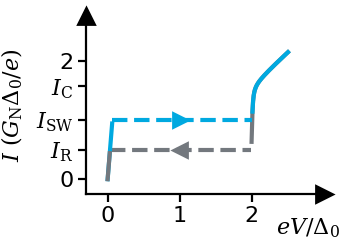

In [18]:
fig, ax = get_figure(figsize=(1.7, 1.2))

ax.plot(V, I_R_jp, "--", color=seegrau80)
ax.plot(V, I_R_dp, color=seegrau80)
ax.plot(1, I_r, "<", color=seegrau80, clip_on=False, ms=5)

ax.plot(V, I_SW_sc, color=seeblau100)
ax.plot(V, I_SW_jp, "--", color=seeblau100)
ax.plot(V, I_SW_dp, color=seeblau100)
ax.plot(1, I_sw, ">", color=seeblau100, clip_on=False, ms=5)

ax.plot(V, I_R_sc, color=seegrau80)

ax.set_xlim([-0.3, 3])
ax.set_xticks([0, 1, 2], labels=["0", "1", "2"])

ax.set_ylim([-0.25, 2.75])
ax.set_yticks(
    [0, 2, I_C, I_sw, I_r],
    labels=["0", "2", "$I_\\mathrm{C}$", "$I_\\mathrm{SW}$", "$I_\\mathrm{R}$"],
)


xlabel = "$eV/\\Delta_0$"
ylabel = "$I\\ (G_\\mathrm{N}\\Delta_0/e)$"
title = "rcsj-iv"

theory_layout(fig, ax, title, xlabel, ylabel, padding=(0.35, 0.15))

# Shapiro iv (over, under, ideal)
https://www.researchgate.net/figure/Schematic-current-voltage-characteristics-of-underdamped-left-and-overdamped-right_fig1_235889223

In [40]:
# generate data

Delta_meV = 0.180
V_mV = np.linspace(-3, 3, 601) * Delta_meV  # mV
A_mV = np.array([0, 0.3, 0.6]) * Delta_meV  # mV
n = np.arange(-10, 11, 1)
I_bias = np.linspace(-3, 3, 601)

G_N = 1
T_K = 0.0
gamma_meV = 0.0
nu_GHz = 10.0
nu = nu_GHz * 1e9
q = 2 * e

alpha = (q * (A_mV * 1e-3)) / (h * nu)
V_n = n * h * nu / q * 1e3 / Delta_0_meV

I_C = np.pi / 2
I_SW_over = 0.2
I_SW_under = 0.5

I_BCS = get_I_nA_bcs(
    V_mV=V_mV,
    G_N=G_N,
    Delta_meV=(Delta_meV, Delta_meV),
    T_K=T_K,
    gamma_meV=gamma_meV,
)

# PAT (Voltage Bias)
I_PAT = np.empty((V_mV.shape[0], A_mV.shape[0]))
for i, a_mV in enumerate(A_mV):
    I_PAT[:, i] = get_I_nA_tg(A_mV=a_mV, V_mV=V_mV, I_nA=I_BCS, nu_GHz=nu_GHz)
I_PAT /= Delta_meV * G_0_muS

# PAT (Current Bias)
V_PAT = np.empty((I_bias.shape[0], A_mV.shape[0]), dtype=np.float64)
for i, a_mV in enumerate(A_mV):
    V_over, I_over = oversample(V_mV / Delta_0_meV, I_PAT[:, i], upsample=100)
    V_PAT[:, i] = bin_y_over_x(I_over, V_over, I_bias)

# Shapiro Heights
w = np.empty((A_mV.shape[0], n.shape[0]))
for i_a, a_mV in enumerate(A_mV):
    for i_n, n_i in enumerate(n):
        w_i = np.abs(jv(n_i, alpha[i_a]))
        w[i_a, i_n] = w_i

# zorder
idx = np.empty_like(w)
for i_n, n_i in enumerate(n):
    idx_i = np.argsort(w[:, i_n])
    idx[:, i_n] = idx_i

# overdamped Shapiro
V_over = np.copy(V_PAT)
for i_a, a_mV in enumerate(A_mV):
    for i_n, n_i in enumerate(n):
        w_i = w[i_a, i_n]
        w_lower = np.sum(w[i_a, 10:i_n])
        w_upper = np.sum(w[i_a, 10 : (i_n + 1)])
        if w_upper < I_C:
            if w_lower > -I_C:
                v = V_over[:, i_a]
                v = np.where(
                    np.logical_and(
                        I_bias <= w_upper * I_SW_over,
                        I_bias >= w_lower * I_SW_over,
                    ),
                    V_n[i_n],
                    v,
                )
                v = np.where(
                    np.logical_and(
                        I_bias >= -w_upper * I_SW_over,
                        I_bias <= -w_lower * I_SW_over,
                    ),
                    -V_n[i_n],
                    v,
                )
                V_over[:, i_a] = v

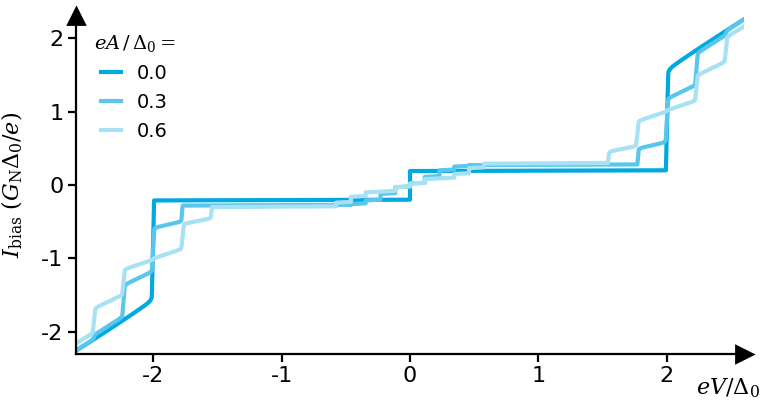

In [41]:
fig, ax = get_figure(figsize=(3.8, 2.0))

colors = [get_color(), get_color(shade="65"), get_color(shade="35")]

for i, a_mV in enumerate(A_mV):
    ax.plot(
        V_over[:, i],
        I_bias,
        "-",
        color=colors[i],
        ms=1,
    )


handles, labels = [], []
for i, a_mV in enumerate(A_mV):
    line_handle = Line2D([0], [0], color=colors[i], linestyle="-")
    label = f"{A_mV[i]/Delta_meV:1.1f}"
    handles.append(line_handle)
    labels.append(label)
ax.legend(
    handles=handles,
    labels=labels,
    title="$eA\\,/\\,\\Delta_0 = $",
    handlelength=1.0,
    loc="upper left",
    frameon=False,
    fontsize=7,
    title_fontsize=7,
    ncols=1,
    columnspacing=1.0,
)

ax.set_xlim(-2.6, 2.6)
ax.set_ylim(-2.3, 2.3)

xlabel = "$eV/\\Delta_0$"
ylabel = "$I_\\mathrm{bias}\\ (G_\\mathrm{N}\\Delta_0/e)$"
title = "shapiro-over"

theory_layout(fig, ax, title, xlabel, ylabel)

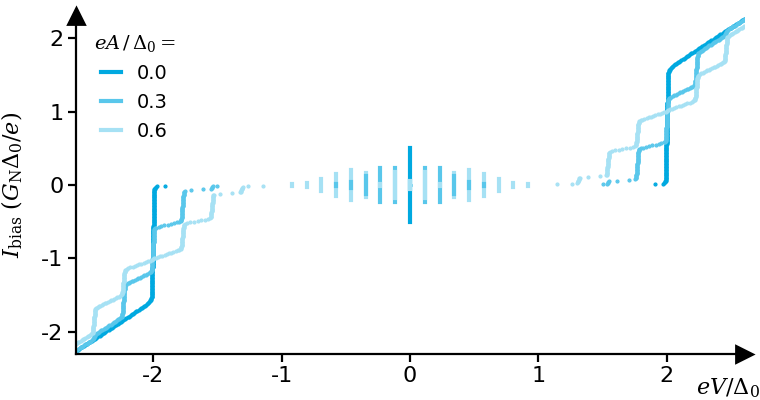

In [42]:
fig, ax = get_figure(figsize=(3.8, 2.0))

colors = [get_color(), get_color(shade="65"), get_color(shade="35")]

for i_a, a_mV in enumerate(A_mV):
    ax.plot(
        V_PAT[:, i_a],
        I_bias,
        ".",
        color=colors[i_a],
        ms=1,
        zorder=i_a,
    )
    for i_n, n_i in enumerate(n):
        V_ss = V_n[i_n]
        I_ss = w[i_a, i_n] * I_SW_under
        if I_ss >= 0.01:
            ax.plot(
                [V_ss, V_ss],
                [-I_ss, I_ss],
                "-",
                ms=1,
                color=colors[i_a],
                zorder=3 - idx[i_a, i_n],
            )


handles, labels = [], []
for i, a_mV in enumerate(A_mV):
    line_handle = Line2D([0], [0], color=colors[i], linestyle="-")
    label = f"{A_mV[i]/Delta_meV:1.1f}"
    handles.append(line_handle)
    labels.append(label)
ax.legend(
    handles=handles,
    labels=labels,
    title="$eA\\,/\\,\\Delta_0 = $",
    handlelength=1.0,
    loc="upper left",
    frameon=False,
    fontsize=7,
    title_fontsize=7,
    ncols=1,
    columnspacing=1.0,
)

ax.set_xlim(-2.6, 2.6)
ax.set_ylim(-2.3, 2.3)

xlabel = "$eV/\\Delta_0$"
ylabel = "$I_\\mathrm{bias}\\ (G_\\mathrm{N}\\Delta_0/e)$"
title = "shapiro-under"

theory_layout(fig, ax, title, xlabel, ylabel)

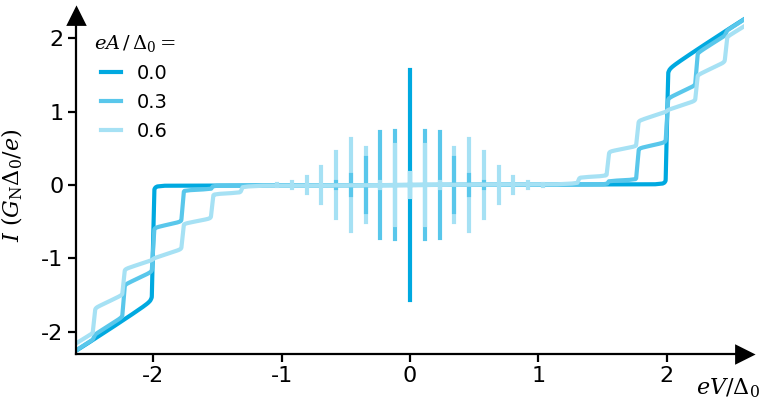

In [43]:
fig, ax = get_figure(figsize=(3.8, 2.0))

colors = [get_color(), get_color(shade="65"), get_color(shade="35")]

for i_a, a_mV in enumerate(A_mV):
    ax.plot(
        V_PAT[:, i_a],
        I_bias,
        "-",
        color=colors[i_a],
        ms=1,
        zorder=i_a,
    )
    for i_n, n_i in enumerate(n):
        V_ss = V_n[i_n]
        I_ss = w[i_a, i_n] * I_C
        if I_ss >= 0.01:
            ax.plot(
                [V_ss, V_ss],
                [-I_ss, I_ss],
                "-",
                ms=1,
                color=colors[i_a],
                zorder=3 - idx[i_a, i_n],
            )


handles, labels = [], []
for i, a_mV in enumerate(A_mV):
    line_handle = Line2D([0], [0], color=colors[i], linestyle="-")
    label = f"{A_mV[i]/Delta_meV:1.1f}"
    handles.append(line_handle)
    labels.append(label)
ax.legend(
    handles=handles,
    labels=labels,
    title="$eA\\,/\\,\\Delta_0 = $",
    handlelength=1.0,
    loc="upper left",
    frameon=False,
    fontsize=7,
    title_fontsize=7,
    ncols=1,
    columnspacing=1.0,
)

ax.set_xlim(-2.6, 2.6)
ax.set_ylim(-2.3, 2.3)

xlabel = "$eV/\\Delta_0$"
ylabel = "$I\\ (G_\\mathrm{N}\\Delta_0/e)$"
title = "shapiro-ideal"

theory_layout(fig, ax, title, xlabel, ylabel)

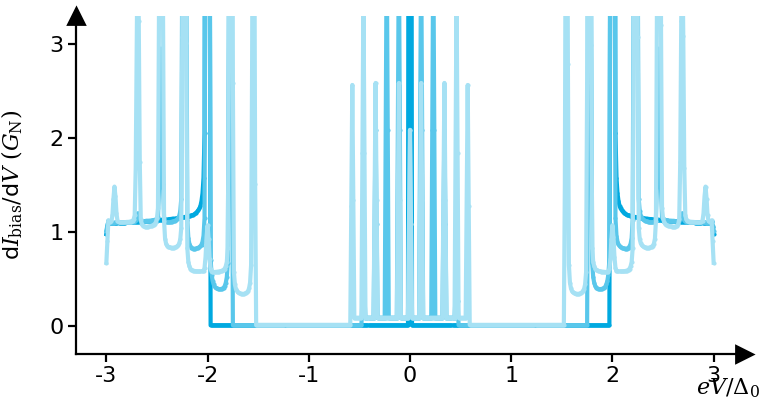

In [52]:
fig, ax = get_figure(figsize=(3.8, 2.0))

colors = [get_color(), get_color(shade="65"), get_color(shade="35")]

for i, a_mV in enumerate(A_mV):
    v_over, i_over = oversample(V_over[:, i] * Delta_0_meV, I_bias, upsample=1000)
    I_over = bin_y_over_x(v_over, i_over, V_mV)
    didv_over = np.gradient(I_over, V_mV) * Delta_0_meV
    ax.plot(
        V_mV / Delta_0_meV,
        didv_over,
        ".-",
        color=colors[i],
        ms=1,
    )

# ax.set_xlim(-2.6, 2.6)
ax.set_ylim(-0.3, 3.3)

xlabel = "$eV/\\Delta_0$"
ylabel = "d$I_\\mathrm{bias}/$d$V\\ (G_\\mathrm{N})$"
title = None

theory_layout(fig, ax, title, xlabel, ylabel)